In [93]:
# !pip install -r api-examples/examples/data-processing/requirements.txt

In [107]:
import mdf_iter               # MDF4 데이터 불러오는 라이브러리
import canedge_browser        # 로컬 또는 S3에 저장된 데이터 가져오는 라이브러리
import can_decoder            # 데이터를 복호화하는 라이브러리
import numpy as np
import pandas as pd           # 데이터분석 라이브러리
from datetime import datetime, timezone  # 날짜와 시간 데이터를 가져올 수 있는 파이썬 라이브러리
from utils import setup_fs, load_dbc_files, restructure_data, add_custom_sig, ProcessData # 폴더 내 위치한 Custom 라이브러리

In [ ]:
devices = ["CSS/DB.mf4"]
dbc_paths = ["dbc_files/CSS-Electronics-SAE-J1939-DEMO.dbc"]

In [96]:
# setup filesystem (local/S3), load DBC files and list log files for processing
fs = setup_fs(s3=False, key="", secret="", endpoint="")


In [97]:
# 리스트형태로 입력한 dbc 파일경로를 받아 list를 생성합니다
db_list = load_dbc_files(dbc_paths)
# canedge_browser.get_log_files는 조건에 맞는 로그 파일 경로를 List로 반환합니다.
log_files = canedge_browser.get_log_files(fs, devices, start_date=start)
print(f"Found a total of {len(log_files)} log files")

print(db_list)
print(log_files)


Found a total of 0 log files
[]


In [98]:
proc = ProcessData(fs, db_list, signals=[])

# 데이터 프레임을 먼저만든뒤
df_phys_all = pd.DataFrame()


In [99]:
# 로그파일 리스트의 데이터를 불러와 데이터프레임에 append
for log_file in log_files:
    # .get_raw_data 는 df_raw 값과 device_id 값 리턴
    df_raw,device_id = proc.get_raw_data(log_file)
    df_phys = proc.extract_phys(df_raw)
    proc.print_log_summary(device_id,log_file,df_phys)
    df_phys_all = df_phys_all.append(df_phys)
    

In [100]:
# df.info 는 함수의 전체정보를 요약해서 출력합니다.
df_phys_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [101]:
df_phys_all.head()

""


In [102]:
def ratio(s1,s2):
    return s2/s1 if s1 else np.nan

In [103]:
df_phys_all = add_custom_sig(df_phys_all, "WheelBasedVehicleSpeed", "EngineSpeed", ratio, "RatioRpmSpeed")

In [104]:
df_phys_all.tail()


""


In [105]:
# 위의 데이터프레임을 재구조화 후 csv 파일로내보내기
df_phys_join = restructure_data(df_phys=df_phys_all, res="1S")
df_phys_join
# df_phys_join.to_csv("output_joined.csv")



,TimeStamp


In [106]:
# 엔진속도를 시각화 
import matplotlib.pyplot as plt

plt.plot(df_phys_join["EngineSpeed"])
plt.xlabel("Time")
plt.ylabel("EngineSpeed")
# plt.legend("E")
plt.show()

KeyError: 'EngineSpeed'

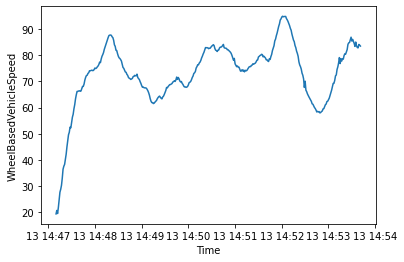

In [ ]:
# WheelBasedVehicleSpeed 시각화
plt.plot(df_phys_join["WheelBasedVehicleSpeed"])
plt.xlabel("Time")
plt.ylabel("WheelBasedVehicleSpeed")
# plt.legend("E")
plt.show()